In [1]:
import pandas as pd
import random
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

n = 6009259 # number of records in file
s = 6000 # sample size (can/should be changed to your preference)

skip_list = sorted(random.sample(range(1,n+1),n-s))

majority_missing = ['mortgage2_limit','mortgage2_balance','mortgage3_limit','mortgage3_balance',
                    'mortgage4_limit','mortgage4_balance','mortgage5_limit','mortgage5_balance',
                    'homeequity1_limit','homeequity1_balance','homeequity2_limit','homeequity2_balance',
                    'homeequity3_limit','homeequity3_balance','homeequity4_limit','homeequity4_balance',
                    'homeequity5_limit','homeequity5_balance','total_homeequity_limit',
                    'total_homeequity_balance','homeequity1_loan_to_value']

sep_df = [pd.read_csv("citizens-home-financing-challenge/zip9_coded_20190" + str(i) + "_pv.csv", skiprows=skip_list, dtype={'zip5': str}).drop(columns=majority_missing) for i in range(4, 10)]
demo_df = pd.read_csv("citizens-home-financing-challenge/zip9_demographics_coded_pv.csv", skiprows=skip_list, dtype={'zip5': str})

sep_demo_merge = demo_df.copy()

for df in range(len(sep_df)):
    sep_demo_merge = sep_demo_merge.merge(sep_df[df], how='inner', on='zip9_code', suffixes=('','_df' + str(df + 4)), validate='one_to_one')
df = sep_demo_merge

other_removals = ['first_homebuyers','zip5','zip9_code']
other_removals.extend(['zip5_df' + str(i) for i in range(4, 10)])
df = df.drop(columns = other_removals).fillna(value=0)
f
df.head()

,age,household_count,person_count,homebuyers,bankcard_limit,bankcard_balance,bankcard_trades,bankcard_util,total_revolving_limit,total_revolving_balance,...,homeequity2_open_df9,homeequity3_open_df9,homeequity4_open_df9,homeequity5_open_df9,total_homeequity_trades_df9,autoloan_open_df9,studentloan_open_df9,bankcard_open_df9,homeequity_open_df9,mortgage_open_df9
0,44.258458,6,7,0,9714.285714,1401.428571,2.428571,0.447817,11253.428571,1409.428571,...,0.0,0.0,0.0,0.0,0.000000,0.285714,0.142857,0.571429,0.000000,0.000000
1,39.275153,9,20,0,5882.550000,883.900000,0.750000,0.525997,7886.450000,1760.950000,...,0.0,0.0,0.0,0.0,0.050000,0.250000,0.150000,0.450000,0.050000,0.050000
2,35.597534,7,15,0,2528.571429,694.214286,1.285714,0.568380,3144.571429,845.714286,...,0.0,0.0,0.0,0.0,0.000000,0.533333,0.066667,0.533333,0.000000,0.000000
3,56.544742,7,13,0,33136.230769,8245.615385,2.692308,0.275404,39150.230769,10929.615385,...,0.0,0.0,0.0,0.0,0.153846,0.230769,0.230769,0.923077,0.153846,0.538462
4,50.472471,8,15,0,17080.066667,690.000000,1.933333,0.095927,18723.400000,1258.066667,...,0.0,0.0,0.0,0.0,0.200000,0.333333,0.000000,0.666667,0.200000,0.133333


In [30]:
df.columns.values

array(['age', 'household_count', 'person_count', 'homebuyers',
       'bankcard_limit', 'bankcard_balance', 'bankcard_trades',
       'bankcard_util', 'total_revolving_limit',
       'total_revolving_balance', 'total_revolving_trades',
       'total_revolving_util', 'mortgage1_limit', 'mortgage1_balance',
       'mortgage1_open', 'mortgage2_open', 'mortgage3_open',
       'mortgage4_open', 'mortgage5_open', 'total_mortgage_limit',
       'total_mortgage_balance', 'total_mortgage_trades',
       'mortgage1_loan_to_value', 'homeequity1_open', 'homeequity2_open',
       'homeequity3_open', 'homeequity4_open', 'homeequity5_open',
       'total_homeequity_trades', 'autoloan_open', 'studentloan_open',
       'bankcard_open', 'homeequity_open', 'mortgage_open',
       'bankcard_limit_df5', 'bankcard_balance_df5',
       'bankcard_trades_df5', 'bankcard_util_df5',
       'total_revolving_limit_df5', 'total_revolving_balance_df5',
       'total_revolving_trades_df5', 'total_revolving_util_df5',

In [23]:
X = df.drop(['homebuyers'], axis = 1).values
y = df[['homebuyers']].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

regressor = MLPRegressor(hidden_layer_sizes=(100, 500, 500, 100), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=500, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
regressor.fit(X_train, y_train)

r2_score(regressor.predict(X_test), y_test)

-0.34842513269635256

In [27]:
for col in df.columns:
    print(col + "\n" + str(np.corrcoef(df["homebuyers"], df[col])))

age
[[ 1.         -0.03935493]
 [-0.03935493  1.        ]]
household_count
[[1.         0.07568426]
 [0.07568426 1.        ]]
person_count
[[1.         0.07111382]
 [0.07111382 1.        ]]
homebuyers
[[1. 1.]
 [1. 1.]]
bankcard_limit
[[1.         0.01039692]
 [0.01039692 1.        ]]
bankcard_balance
[[1.         0.01620717]
 [0.01620717 1.        ]]
bankcard_trades
[[1.         0.03681945]
 [0.03681945 1.        ]]
bankcard_util
[[ 1.         -0.00988698]
 [-0.00988698  1.        ]]
total_revolving_limit
[[1.         0.00667353]
 [0.00667353 1.        ]]
total_revolving_balance
[[1.         0.00292531]
 [0.00292531 1.        ]]
total_revolving_trades
[[1.         0.03263498]
 [0.03263498 1.        ]]
total_revolving_util
[[ 1.         -0.01181467]
 [-0.01181467  1.        ]]
mortgage1_limit
[[1.        0.0026272]
 [0.0026272 1.       ]]
mortgage1_balance
[[1.         0.00131397]
 [0.00131397 1.        ]]
mortgage1_open
[[1.        0.0153423]
 [0.0153423 1.       ]]
mortgage2_open
[[1

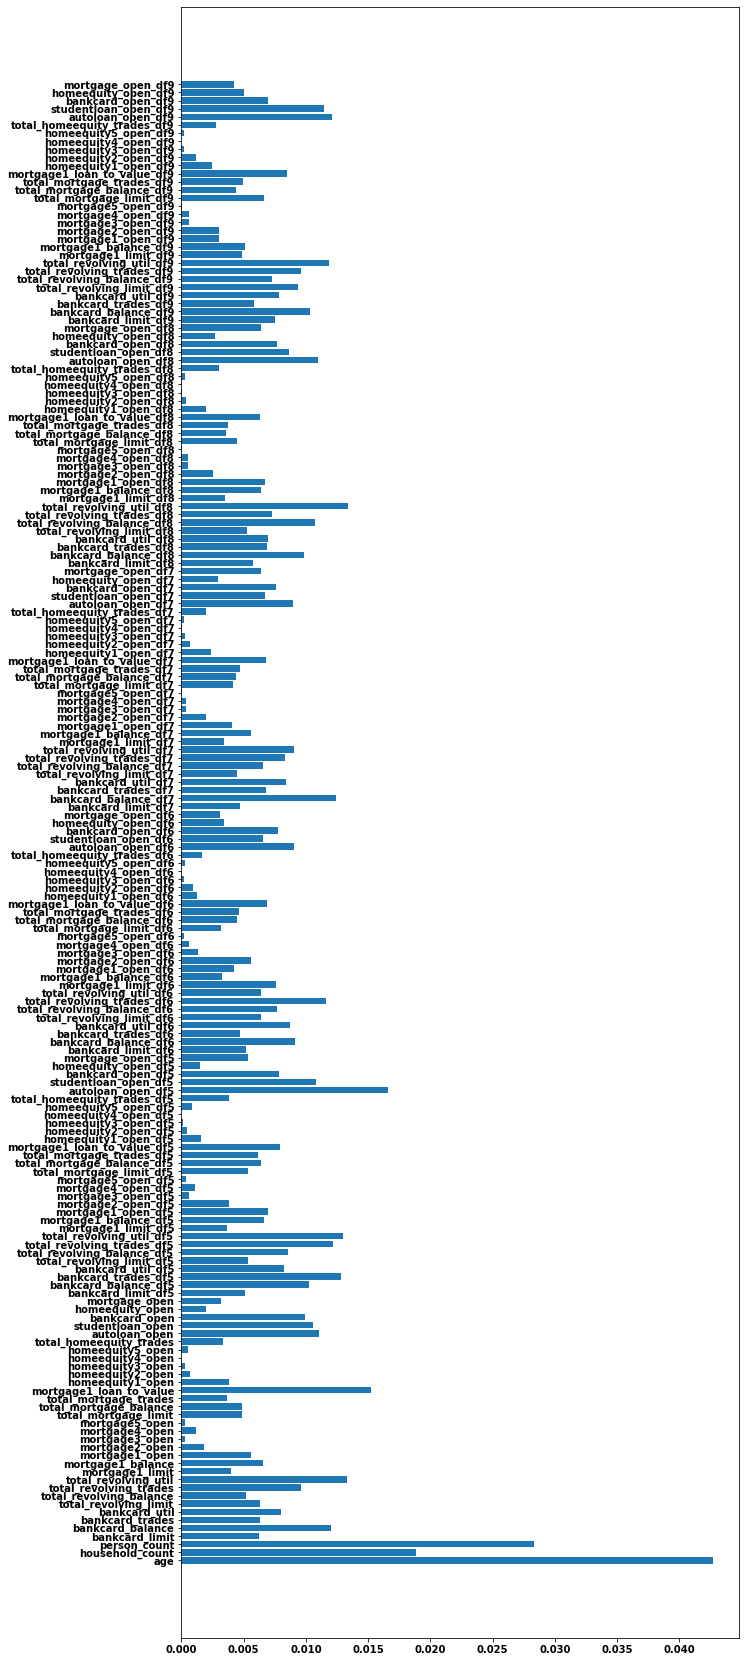

In [16]:

plt.figure(figsize = (10, 30))
plt.barh(df.drop(['homebuyers'], axis = 1).columns.values, regressor.feature_importances_)
plt.grid()
plt.show()